# Проект: Статистический анализ данных 

В нашем распоряжении данные, популярного сервиса аренды самокатов GoFast, о некоторых пользователях из нескольких городов, а также об их поездках. \
**Цель исследования:** проанализируем данные сервиса аренды и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Ход исследования:**\
Для этого нам потребуется пройти следующие шаги: \
Шаг 1 - Загрузка и изучение общей информации о датасетах; \
Шаг 2 - Предобработка данных; \
Шаг 3 - Исследовательский анализ данных; \
Шаг 4 - Объединение данных; \
Шаг 5 - Подсчет выручки; \
Шаг 6 - Проверка гипотез; \
Шаг 7 - Распределения. \
Общий вывод.

## Шаг 1. Загрузка данных

Загружаем библиотеки, которые понадобятся в нашем исследовании 

In [1]:
import pandas as pd # импоритруем pandas для обработки, анализа и структурирования данных
import numpy as np # импоритруем numpy для работы с данными
import matplotlib.pyplot as plt # так же импоритруем matplotlib.pyplot для будущего построения графиков
from scipy import stats as st # импоритруем stats из библиотеки scipy для проверки гипотез и проведения t-тестов
from scipy.stats import binom, norm # для выполнения 7 шага

### 1.1 Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas

In [2]:
try: # открываем наши файлы с данными в среде JupiterHUB:
    data_users = pd.read_csv('/datasets/users_go.csv') # представлена информация о пользователях
    data_rides = pd.read_csv('/datasets/rides_go.csv') # представлена информация об их поездках
    data_subs = pd.read_csv('/datasets/subscriptions_go.csv') # представлена информация об их подписках
except: # либо берем данные на ПК для локальной версии Jupiter:
    data_users = pd.read_csv('C://Users//Voova//datasets//users_go.csv') 
    data_rides = pd.read_csv('C://Users//Voova//datasets//rides_go.csv')
    data_subs = pd.read_csv('C://Users//Voova//datasets//subscriptions_go.csv')

### 1.2 Изучим общую информацию о каждом датафрейме. Выведим первые строки каждого набора данных.

- Общая информация о пользователях: 

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


На первый взгляд можно сказать, что в данных о пользователях нет пропущенных значений, столбцы подписаны согласно правилам, типы данных соответствуют содержимому столбцов.

- Общая информация о поездках пользователей: 

In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


На первый взгляд можно сказать, что в данных о поездках нет пропущенных значений, столбцы подписаны согласно правилам, тип данных столбца `date` является `object`, тогда как должен быть `datetime`. Вернемся к нему на этапе предобработки данных. Так же предлагаю округлить значения в столбцах `distance` и `duration` до десятых. 

- общая информация о подписках пользователей: 

In [7]:
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [8]:
data_subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В данном датафрейме присутствует всего две строки, пропуски не обнаружены, столбцы подписаны согласно правилам, типы данных соответствуют содержимому столбцов.

### Вывод:  

 Датафрейм `users_go.csv` содержит 1565 строк, пропуски отсутствуют, типы данных корректные. \
 Датафрейм `rides_go.csv` содержит 18 068 строк, пропуски отсутствуют, тип данных столбца `date` необходимо изменить на этапе предобработки данных. \
 Датафрейм `subscriptions_go.csv` содержит 2 строки, пропуски отсутствуют, типы данных корректные. \
 На этапе предобработки данных проверим наши датафреймы на наличие явных и неявных дубликатов. 

## Шаг 2. Предобработка данных

### 2.1 Приведем тип даных столбца date датафрейма data_rides к типу даты

In [9]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d') # используем функцию to_datetime
data_rides['date'].head() # проверим преобразование

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

- а так же округлим значения в столбцах `distance` и `duration` до десятых: 

In [10]:
data_rides['distance'] = data_rides['distance'].round(2)
data_rides['duration'] = data_rides['duration'].round(2)

### 2.2 Создадим новый столбец с номером месяца на основе столбца date

In [11]:
# проверим за какой период у нас данные:
display(data_rides['date'].max())
data_rides['date'].min()

Timestamp('2021-12-30 00:00:00')

Timestamp('2021-01-01 00:00:00')

Все поездки представлены за 2021 год, с 1 января по 30 декабря, можем добавлять столбец с номером месяца.

In [12]:
data_rides['month'] = data_rides['date'].dt.month # метод dt.month возвращает месяц в виде целого числа

### 2.3 Проверим наличие дубликатов в датафреймах

2.3.1 Рассмотрим таблицу `data_users`:

In [13]:
data_users.duplicated().sum() # суммируем количество явных дубликатов

31

Удаляем дубликаты в таблице `data_users`:

In [14]:
data_users.drop_duplicates(inplace=True)

In [15]:
data_users.duplicated().sum() # проверка наличия дубликатов 

0

В столбцах `name` и `city` могут встречаться не явные дубликаты, проверим эти столбцы: 

In [16]:
data_users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

- Неявные дубликаты в столбце `name` отсутствуют.

In [17]:
data_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

- Неявные дубликаты в столбце `city` отсутствуют.

2.3.2 Рассмотрим таблицу `data_rides`:

In [18]:
data_rides.duplicated().sum() # суммируем количество явных дубликатов

0

Дубликаты в датафрейме `data_rides` не обнаружены.

Проверим данные в столбце `duration` на предмет аномальных значений

In [19]:
data_rides.sort_values(by = ['duration'], ascending = False)

,user_id,distance,duration,date,month
4215,454,5137.33,40.82,2021-12-27,12
4709,507,4645.64,39.87,2021-01-15,1
2623,278,4754.43,39.53,2021-12-02,12
1998,216,4831.34,38.35,2021-05-11,5
6453,694,4210.87,38.27,2021-03-11,3
...,...,...,...,...,...
6680,712,4684.00,0.50,2021-03-04,3
6695,713,5215.64,0.50,2021-02-25,2
6768,718,5197.44,0.50,2021-02-11,2
13012,1176,4935.07,0.50,2021-05-14,5


Присутствуют поездки по половине минуты на расстояния более 4-х километров, это скорость порядка 340 км/ч. На мой взгляд разогнать самокат до такой скорости проблематично, поэтому посчитаем количество таких случаев и решим, что с ними делать: 

In [20]:
duration_anomalies = data_rides[(data_rides['duration'] == 0.5) & (data_rides['distance'] > 210)] # принимаем разрешенную скорость самоката за 25 км/ч
# или 25*1000/3600 = 6,94 м/с 
# следовательно за 30 секунд самокат проедет примерно  210 метров на разрешенной скорости, поэтому расстояния больше 210 м мы будем считать аномальными 
# в наших данных
duration_anomalies

,user_id,distance,duration,date,month
6531,701,4196.45,0.5,2021-08-31,8
6570,704,4830.82,0.5,2021-10-14,10
6680,712,4684.00,0.5,2021-03-04,3
6695,713,5215.64,0.5,2021-02-25,2
6768,718,5197.44,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.34,0.5,2021-01-19,1
17242,1477,6724.93,0.5,2021-01-12,1
17314,1483,4445.48,0.5,2021-03-06,3
17505,1496,5722.55,0.5,2021-02-14,2


Получилось 95 строк из 18 068, что составляет 0,53 % от общего числа строк датафрейма. 

In [21]:
duration_anomalies['distance'].min() # минимальное расстояние, пройденное за 30 секунд

4030.31

In [22]:
duration_anomalies['distance'].max() # максимальное расстояние, пройденное за 30 секунд

7211.01

- Предлагаю допустить, что на сервисе сбора геоданных произошел сбой и полученные данные уменьшились в 50 раз, тогда наши 0,5 мин * 50 = 25 мин.  \
Тогда получится, что: \
4030 м будут пройдены за 25 мин со скоростью 9,7 км/ч. \
7211 м будут пройдены за 25 мин со скоростью 17,3 км/ч. \
Остальные значения между min и max будут тоже в адекватной форме.    

In [23]:
# находим строки подходящие под наши аномальные значения и умножаем их на 50
data_rides.loc[(data_rides['duration'] == 0.5) & (data_rides['distance'] > 210), 'duration'] *= 50 
# хотя конечно мы могли бы и просто их удалить

Проверим данные в столбце `distance` на предмет аномальных значений

In [24]:
data_rides.sort_values(by = ['distance'], ascending = True)

,user_id,distance,duration,date,month
11555,1069,0.86,10.00,2021-01-31,1
9541,925,2.57,3.01,2021-10-19,10
13690,1223,4.33,4.01,2021-05-22,5
8658,861,6.78,6.02,2021-07-21,7
7841,796,7.10,10.03,2021-11-26,11
...,...,...,...,...,...
17242,1477,6724.93,25.00,2021-01-12,1
17171,1471,6760.94,32.04,2021-08-03,8
15580,1361,6908.49,23.82,2021-03-27,3
16484,1422,7066.00,23.62,2021-02-12,2


Могу сказать, что прохождение небольшой дистанции за относительно большое время может быть обусловлено большим количеством остановок. \
Например 0,86 м за 10 минут - видимо пользователь взял самокат и большинство своего оплаченного времени стоял на месте и как только поехал - его время вышло. \
Следовательно аномальных значений не обнаружено. 

2.3.3 Рассмотрим таблицу data_subs:

In [25]:
data_subs.duplicated().sum() # суммируем количество явных дубликатов

0

Дубликаты в датафрейме `data_subs` не обнаружены.

### Вывод: 
В ходе мероприятий по предобработки данных проведены следующие операции:
- Данные столбца `date` приведены к типу даты `datetime64`.
- В таблице `data_rides` создан новый столбец `month` с номером месяца.
- Расстояния в столбце `distance` и `duration` округлены до десятых.
- Устранены дубликаты в таблице `data_users`.
- В столбце `duration` таблицы `data_rides` выявлены и исправлены аномальные значения времени поездок. 

## Шаг 3. Исследовательский анализ данных

- Опишим и визуализируем общую информацию о пользователях и поездках:

### 3.1 Частота встречаемости городов

Для начала воспользуемся сводной таблицей и посчитаем с какой частотой распределены пользователи по городам: 

In [26]:
svod_city = data_users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by = ['user_id'], ascending = False)
svod_city['kol_vo'] = len(data_users['user_id']) # добавляем столбец с общим количеством пользователей
svod_city['percent'] = (svod_city['user_id']*100 / svod_city['kol_vo']).round(1) # считаем долю пользователей определенного города относительно общего
# количества пользователей 
svod_city = svod_city.rename(columns = {'user_id' : 'Кол-во пользователей', 'kol_vo' : 'Общее количество пользователей', 'percent' : 'Доля от общего',})
svod_city

,Кол-во пользователей,Общее количество пользователей,Доля от общего
city,,,
Пятигорск,219,1534,14.3
Екатеринбург,204,1534,13.3
Ростов-на-Дону,198,1534,12.9
Краснодар,193,1534,12.6
Сочи,189,1534,12.3
Омск,183,1534,11.9
Тюмень,180,1534,11.7
Москва,168,1534,11.0


Визуализируем нашу таблицу в виде столбчатой диаграммы: 

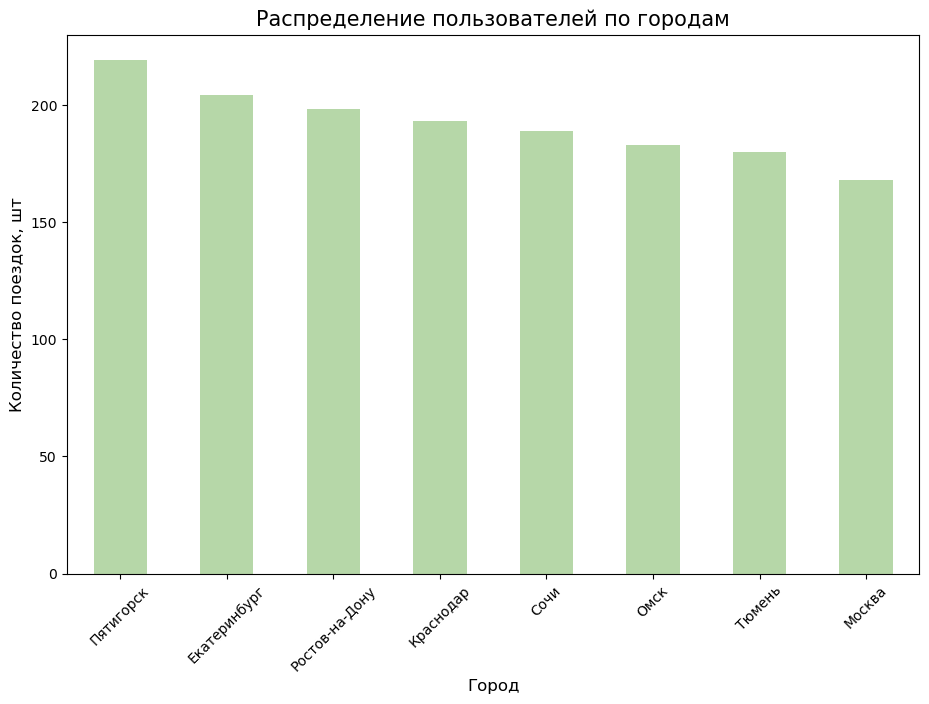

In [27]:
( # построим диаграмму методом .plot()
    data_users
    .groupby('city')['user_id']
    .count()
    .sort_values(ascending = False)
    .plot(kind='bar', figsize=(11, 7), color = '#B6D7A8')
)
plt.xticks(rotation=45)
plt.title('Распределение пользователей по городам', size=15)
plt.xlabel('Город', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.show()

**Вывод:** \
Исходя из диаграммы и сводной таблицы выше - мы можем сказать, что все наши 1534 пользователя почти равномерно распределены между восьмью населенными пунктами. \
Большинство пользователей из Пятигорска - 219 чел., 14,3%. \
Меньше всего пользователей из Москвы - 168 чел., 11%. 

### 3.2 Соотношение пользователей с подпиской и без подписки

Воспользуемся сводной таблицей и посчитаем с какой частотой распределены пользователи с подпиской и без:

In [28]:
svod_sub = data_users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').sort_values(by = ['user_id'], ascending = False)
svod_sub['kol_vo'] = len(data_users['user_id']) # добавляем столбец с общим количеством пользователей
svod_sub['percent'] = (svod_sub['user_id']*100 / svod_sub['kol_vo']).round(1) # считаем долю пользователей с подпиской и без - относительно общего
# количества пользователей 
svod_sub = svod_sub.rename(columns = {'user_id' : 'Кол-во пользователей', 'kol_vo' : 'Общее количество пользователей', 'percent' : 'Доля от общего',})
svod_sub

,Кол-во пользователей,Общее количество пользователей,Доля от общего
subscription_type,,,
free,835,1534,54.4
ultra,699,1534,45.6


Визуализируем нашу таблицу в виде круговой диаграммы:

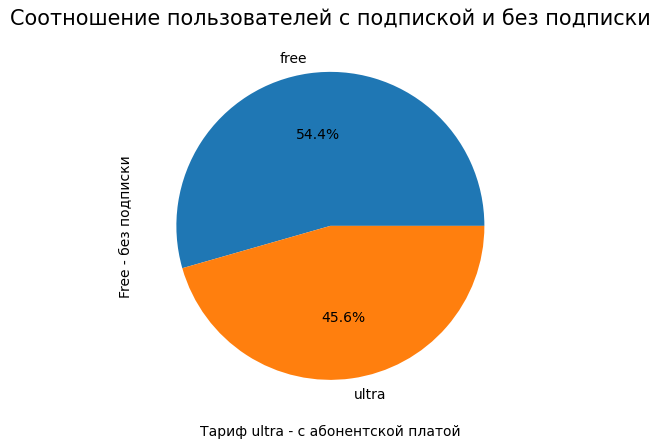

In [29]:
(
    data_users
    .groupby('subscription_type')['user_id']
    .count()
    .plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')
)
plt.xticks(rotation=45)
plt.title('Соотношение пользователей с подпиской и без подписки', size=15)
plt.xlabel('Тариф ultra - с абонентской платой')
plt.ylabel('Free - без подписки')
plt.show()

**Вывод:** \
Как мы можем видеть на нашей диаграмме - 54,4 % пользователей не используют подписку. 

### 3.3 Возраст пользователей

In [30]:
data_users['age'].describe().round(1) # используем метод .describe() - список характерных значений

count    1534.0
mean       24.9
std         4.6
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

- Можем отметить, что средний возраст пользователей - 25 лет.

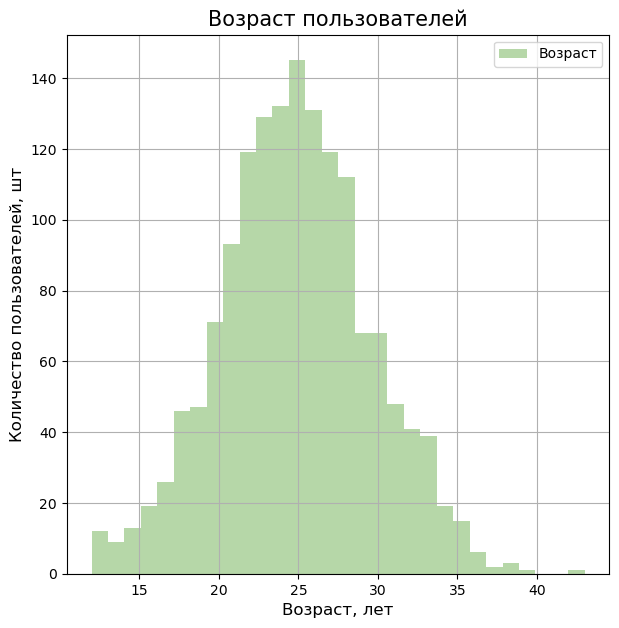

In [31]:
( # построим гистограмму методом .plot()
    data_users
    .plot(kind='hist', y = 'age', histtype = 'bar', alpha = 1, label = 'Возраст', grid = True, bins = 30, figsize=(7, 7), color = '#B6D7A8')
)
plt.title('Возраст пользователей', size=15)
plt.xlabel('Возраст, лет', size=12)
plt.ylabel('Количество пользователей, шт', size=12)
plt.show()

**Вывод:** \
Основная масса пользователей находится в возрасте от 20 до 30 лет и наравне с этим наибольшее количество пользователей находится в возрасте 25 лет. \
Зависимость возраста пользователей от их количества соответствует нормальному распределению. 

### 3.4  Расстояние, которое пользователь преодолел за одну поездку

In [32]:
data_rides['distance'].describe().round(2)

count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

В среднем, пользователи преодолевали порядка 3 километров, посмотрим на диаграмме. 

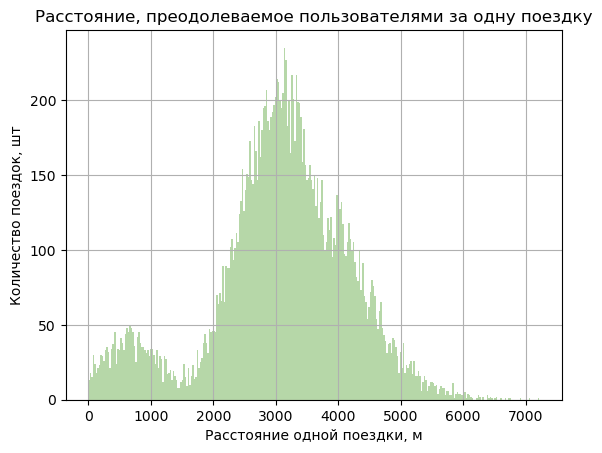

In [33]:
plt.hist(data_rides['distance'], bins=300, range=(0,7220), color = '#B6D7A8')
plt.title('Расстояние, преодолеваемое пользователями за одну поездку')
plt.xlabel('Расстояние одной поездки, м')
plt.ylabel('Количество поездок, шт')
plt.grid()
plt.show()

**Вывод:** \
Основная масса поездок проходила на расстояние от 2 до 4,5 километров, наибольшее количество раз пользователи уезжали на 3,2 километра.\
Зависимость расстояния одной поездки пользователей от их количества соответствует нормальному распределению. 

### 3.5 Продолжительность поездок 

In [34]:
data_rides['duration'].describe().round(2)

count    18068.00
mean        17.93
std          5.98
min          2.04
25%         13.70
50%         17.75
75%         21.82
max         40.82
Name: duration, dtype: float64

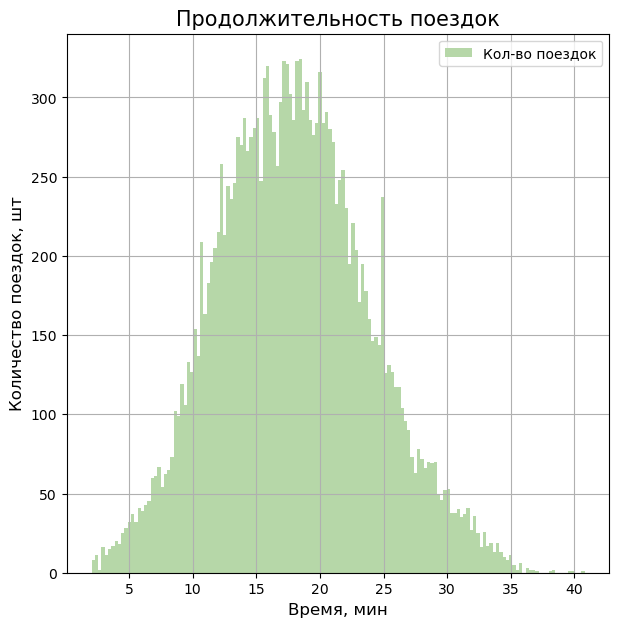

In [35]:
( # построим гистограмму методом .plot()
    data_rides
    .plot(kind='hist', y = 'duration', histtype = 'barstacked', alpha = 1, label = 'Кол-во поездок', grid = True, bins = 150, figsize=(7, 7), color = '#B6D7A8')
)
plt.title('Продолжительность поездок', size=15)
plt.xlabel('Время, мин', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.show()

- Среднее время поездки занимает порядка 18 минут, вместе с этим - наибольшее количество поездок лежит в диапазоне от 8 до 27 минут. \
  Зависимость продолжительности поездок от их количества соответствует нормальному распределению. 

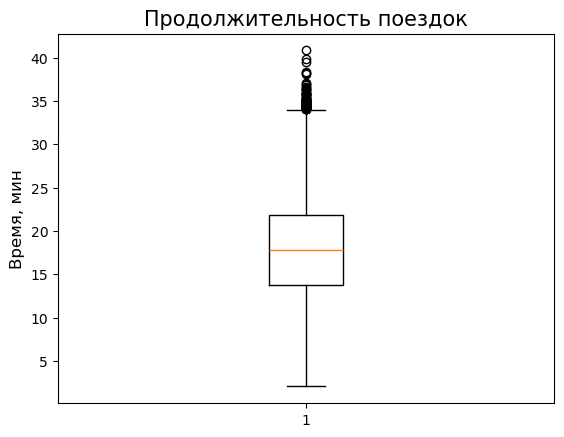

In [65]:
# посмотрим на боксплот продолжительности поездки
plt.boxplot(data_rides['duration'])
plt.title('Продолжительность поездок', size=15)
plt.ylabel('Время, мин', size=12)
plt.show()

Как видно на боксплоте, поездки дольше 34 минут считаются выбросами.

### ВЫВОД: 
- Количество пользователей в нашей выборке почти равномерно распределено между восьмью городами, однако: \
Большинство пользователей из Пятигорска - 219 чел., 14,3%. \
Меньше всего пользователей из Москвы - 168 чел., 11%.
- 54,4 % пользователей не используют подписку на сервис.
- Сервис является наиболее привлекательным для людей 25 лет.
- Основная масса поездок проходила на расстояние от 2 до 4,5 километров.
- Среднее время поездки занимает порядка 18 минут.

## Шаг 4. Объединение данных

### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм

Как мы помним, таблицы `data_users` и `data_rides` имеют общий столбец *user_id*, а так же таблица `data_users` и `data_subs` имеют общий столбец *subscription_type*. \
Поэтому мы последовательно объединим `data_users` с `data_rides` и `data_subs` методом `merge()`.

In [36]:
data = pd.merge(data_users, data_rides, on = 'user_id') #  по умолчанию .merge() выполняет внутреннее объединение inner join
data = pd.merge(data, data_subs, on = 'subscription_type') 
data.head(10) # выведем первые 10 строк для просмотра

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.65,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.93,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.12,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.24,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.04,2021-11-22,11,6,0,199


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Количество строк в полученной таблице совпадает с таблицей `data_rides`, а 12 столбцов соответствует количеству столбцов всех трех датафреймов, без учета повторяющихся (но с учетом того, что один столбец `month` мы добавили сами). Строки ненулевые, типы данных корректные. 

### 4.2 Создадим ещё два датафрейма из объединенной таблицы 

4.2.1 С данными о пользователях без подписки:

In [38]:
data_free = data[data['subscription_type'] == 'free'] # оставляем только строки со значениями free в столбце subscription_type
data_free.sample(5) # выведем рандомные 5 строк полученного датафрейма

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
7703,786,Виолетта,23,Сочи,free,4103.95,16.68,2021-03-16,3,8,50,0
14058,1249,Амалия,28,Тюмень,free,2582.15,11.11,2021-09-25,9,8,50,0
8752,869,Анна,26,Сочи,free,3462.36,20.98,2021-01-26,1,8,50,0
16747,1439,Василина,23,Ростов-на-Дону,free,2637.78,15.55,2021-04-16,4,8,50,0
17439,1491,Адель,31,Сочи,free,693.39,9.78,2021-03-09,3,8,50,0


4.2.2 С данными о пользователях с подпиской:

In [39]:
data_ultra = data[data['subscription_type'] == 'ultra'] # оставляем только строки со значениями ultra в столбце subscription_type
data_ultra.sample(5) # выведем рандомные 5 строк полученного датафрейма

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
3448,372,Арсен,26,Ростов-на-Дону,ultra,2533.93,28.20,2021-01-02,1,6,0,199
1090,116,Марат,28,Москва,ultra,2500.93,10.15,2021-12-22,12,6,0,199
1621,174,Инна,28,Краснодар,ultra,3794.40,35.77,2021-12-23,12,6,0,199
1818,197,Евгения,31,Москва,ultra,3317.73,18.29,2021-04-19,4,6,0,199
4583,495,Святогор,24,Омск,ultra,3070.36,18.21,2021-02-24,2,6,0,199


### 4.3 Визуализируем информацию о полученных датафреймах

4.3.1 Расстояние, преодолеваемое пользователями без подписки: 

In [40]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

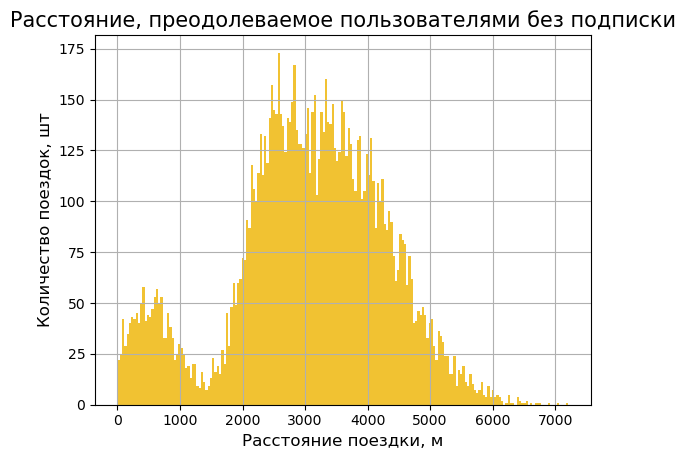

In [41]:
plt.hist(data_free['distance'], bins=200, color = '#F1C232')
plt.title('Расстояние, преодолеваемое пользователями без подписки', size=15)
plt.xlabel('Расстояние поездки, м', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.grid()
plt.show()

- В среднем, пользователи без подписки проезжают 3045 м, медианное значение равно 3114 м.
- Основная масса пользователей без подписки проезжает от 2 до 4,7 километров. 

4.3.2 Время поездки пользователей без подписки:

In [42]:
data_free['duration'].describe()

count    11568.000000
mean        17.592101
std          6.174181
min          2.040000
25%         13.127500
50%         17.450000
75%         21.780000
max         34.950000
Name: duration, dtype: float64

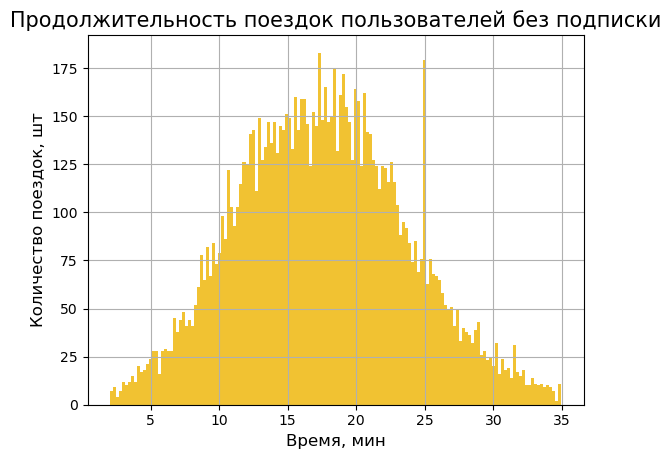

In [43]:
plt.hist(data_free['duration'], bins=150, color = '#F1C232')
plt.title('Продолжительность поездок пользователей без подписки', size=15)
plt.xlabel('Время, мин', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.grid()
plt.show()

- Среднее время поездки пользователей без подписки занимает порядка 17,5 минут.
- Основная масса пользователей без подписки затрачивают на поездку от 8 до 27 минут.

4.3.3 Расстояние, преодолеваемое пользователями с подпиской: 

In [44]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

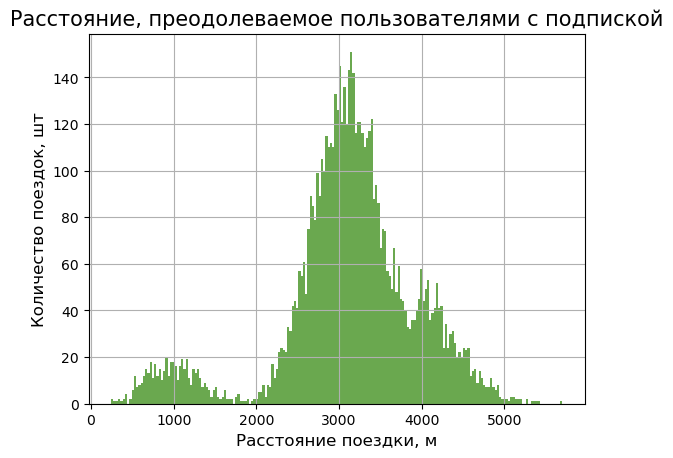

In [45]:
plt.hist(data_ultra['distance'], bins=200, color = '#6AA84F')
plt.title('Расстояние, преодолеваемое пользователями с подпиской', size=15)
plt.xlabel('Расстояние поездки, м', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.grid()
plt.show()

- В среднем, пользователи с подпиской проезжают 3115 м, медианное значение равно 3148 м.
- Основная масса пользователей с подпиской проезжает от 2,5 до 3,5 километров. 

4.3.4 Время поездки пользователей с подпиской:

In [46]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.542017
std         5.572065
min         3.760000
25%        14.527500
50%        18.180000
75%        21.880000
max        40.820000
Name: duration, dtype: float64

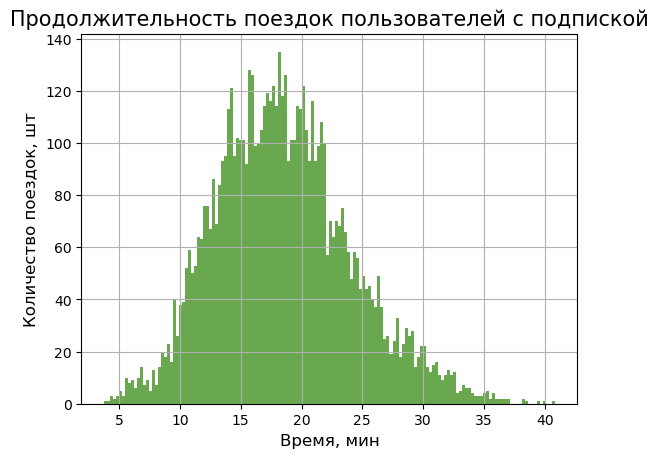

In [47]:
plt.hist(data_ultra['duration'], bins=150, color = '#6AA84F')
plt.title('Продолжительность поездок пользователей с подпиской', size=15)
plt.xlabel('Время, мин', size=12)
plt.ylabel('Количество поездок, шт', size=12)
plt.grid()
plt.show()

- Среднее время поездки пользователей с подпиской занимает порядка 18,5 минут.
- Основная масса пользователей с подпиской затрачивают на поездку от 10 до 25 минут. 

### ВЫВОД: 
- В данном разделе мы объединили данные о пользователях, поездках и подписках в один датафрейм `data`.
- Из общего датафрейма выделили два типа пользователей: \
  `data_free` - пользователи без платной подписки на сервис; \
  `data_ultra` - пользователи с платной подпиской на сервис.  

- Визуализировали данные о расстоянии и времени поездок для каждого типа пользователей: \
 Пользователи *без подписки* на сервис проезжают от **2** до **4,7** километров со средним временем поездки **17,5** минут. \
 Тогда как пользователи *с платной подпиской* проезжают от **2,5** до **3,5** километров со средним временем поездки **18,5** минут. 

Так же можем отметить, что пользователи платной подписки почти не проезжают больше 5 километров, тогда как пользователи без подписки преодолевают до 7 километров.\
Подводя итог по полученным данным, можем сказать, что гистограммы нормального распределения у платных пользователей более вытянуты вверх, пользователи без подписки преодолевают большие расстояния за меньшее среднее время, соответсовенно они двигаются быстрее, чем пользователи с подпиской.  \
Так как плата взымается поминутно, более медленные пользователи - выгодны для сервиса. 


## Шаг 5. Подсчет выручки

### 5.1 Создадим датафрейм с агрегированными данными о поездках 

Для корректного создания таблицы с аггрегированными данными, округлим данные в столбце `duration` в большую сторону. 

In [72]:
# Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа
data['duration'] = np.ceil(data['duration']) # каждое значение из столбца duration округляется с помощью «потолка»

Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [73]:
agg_data = (
    data
    .groupby(['user_id', 'name', 'month', 'subscription_type'])
    .agg(
    total_distance = ('distance', 'sum'), # общее расстояние поездок
    total_drive = ('distance', 'count'), # общее количество поездок
    total_time = ('duration', 'sum') # общее время поездок отдельного пользователя
)).reset_index()
agg_data.head()

,user_id,name,month,subscription_type,total_distance,total_drive,total_time
0,1,Кира,1,ultra,7027.51,2,42.0
1,1,Кира,4,ultra,754.16,1,7.0
2,1,Кира,8,ultra,6723.47,2,46.0
3,1,Кира,10,ultra,5809.91,2,32.0
4,1,Кира,11,ultra,7003.50,3,56.0


In [74]:
# проверим нашу сводную таблицу на пропуски данных в стобцах:
agg_data.isna().sum()

user_id              0
name                 0
month                0
subscription_type    0
total_distance       0
total_drive          0
total_time           0
dtype: int64

- Пропуски не обнаружены

### 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

- Тарифы сервиса GoFast:
  
`Без подписки:`\
Абонентская плата отсутствует;\
Стоимость одной минуты поездки — 8 рублей;\
Стоимость старта (начала поездки) — 50 рублей.

`С подпиской Ultra:`\
Абонентская плата — 199 рублей в месяц;\
Стоимость одной минуты поездки — 6 рублей;\
Стоимость старта — бесплатно.

In [75]:
# Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа
#agg_data['total_time'] = np.ceil(agg_data['total_time']) # каждое значение из столбца duration округляется с помощью «потолка»

Воспользуемся функцией для подсчета помесячной выручки: \
Помесячная выручка считается по формуле: (стоимость старта поездки ×  количество поездок) + (стоимость одной минуты поездки 
× общая продолжительность всех поездок в минутах) + стоимость подписки.

In [76]:
def calculate_profit(row):
    if row['subscription_type'] == 'free':
        subs_cost = 0
        minute_cost = 8
        start_cost = 50       
    elif row['subscription_type'] == 'ultra':
        subs_cost = 199
        minute_cost = 6
        start_cost = 0
    profit = (start_cost * row['total_drive']) + (minute_cost * row['total_time']) + subs_cost
    return profit

Создадим новый столбец со значениями нашей функции: 

In [77]:
agg_data['profit'] = agg_data.apply(calculate_profit, axis=1) # значение axis=1 указывает на то, что мы применяем функцию к каждой строке

In [78]:
agg_data.head()

,user_id,name,month,subscription_type,total_distance,total_drive,total_time,profit
0,1,Кира,1,ultra,7027.51,2,42.0,451.0
1,1,Кира,4,ultra,754.16,1,7.0,241.0
2,1,Кира,8,ultra,6723.47,2,46.0,475.0
3,1,Кира,10,ultra,5809.91,2,32.0,391.0
4,1,Кира,11,ultra,7003.50,3,56.0,535.0


In [79]:
# посмотрим общую выручку GoFast за 2021 год: 
total_money = agg_data['profit'].sum()
print('Общая выручка за 2021 год составила:', total_money, 'рублей')  

Общая выручка за 2021 год составила: 3896133.0 рублей


### Вывод: 
- На данном этапе мы создали новый датафрейм `agg_data` с агрегированными данными по суммарному расстоянию, количеству поездок и суммарному времени поездок для каждого пользователя, за каждый месяц на основе датафрейма `data` с объединенными данными.
- Добавили столбец с помесячной выручкой, которую принес каждый пользователь.
- Выяснили, что за год сервис GoFast показал выручку в 3,896 млн. рублей. 

## Шаг 6. Проверка гипотез

### 6.1 Разберемся, тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. \
Выдвигаем гипортезы: 
- Н0: Время поездки *пользователей с подпиской* **равно** времени поездки *пользователей без подписки*.\
  Н0: T(ultra) = T(free);
- H1: Время поездки *пользователей с подпиской* **больше** времени поездки *пользователей без подписки*.\
  Н1: T(ultra) > T(free). \
  Уровень статистической значимости alpha = 0.05

In [54]:
# так как у нас имеются две независимые выборки - проверяем гипотезу о равенстве средних двух генеральных совокупностях 
alpha = 0.05
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')
# параметр greater говорит о том, что будет проверена правосторонняя альтернативная теория

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 5.4016026441368745e-25
Отвергаем нулевую гипотезу


Так как нулевая гипотеза отвергнута - у нас есть основания утверждать, что пользователи с подпиской тратят больше времени на поездки, а следовательно и являются более "выгодными" для компании. Подтвердился наш вывод в пункте 4.3.  

### 6.2 Проверим, проезжают ли пользователи расстояние, оптимальное с точки зрения износа самоката

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. \
Выдвигаем гипортезы: 
- Н0: Расстояние поездки *пользователей с подпиской* **равно** 3130 метров.\
  Н0: L(ultra) = 3130;
- H1: Расстояние поездки *пользователей с подпиской* **больше** 3130 метров.\
  Н1: L(ultra) > 3130. \
  Уровень статистической значимости alpha = 0.05

In [55]:
# так как у нас имееся одна независимая выборка - проверяем гипотезу о равенстве среднего генеральной совокупности числу, 
# зафиксированному в нулевой гипотезе
value = 3130
alpha = 0.05
results = st.ttest_1samp(data_ultra['distance'], value, alternative = 'greater')
# параметр greater говорит о том, что будет проверена правосторонняя альтернативная теория

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не удалось отвергнуть нулевую гипотезу


Так как нулевая гипотеза не отвергнута - есть основания утверждать, что пользователи с подпиской не превышают оптимального расстояния в 3130 метров в своих поездках. Так же мы видели в пункте 4.3.3, что в среднем, пользователи с подпиской проезжают 3115 метров. 

### 6.3 Проверим, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Выдвигаем гипортезы: 
- Н0: Помесячная выручка *пользователей с подпиской* **равна** помесячной выручке *пользователей без подписки*.\
  Н0: P(ultra) = P(free);
- H1: Помесячная выручка *пользователей с подпиской* **больше** помесячной выручки *пользователей без подписки*.\
  Н1: Р(ultra) > Р(free). \
  Уровень статистической значимости alpha = 0.05

In [56]:
# посмотрим значения дисперсий пользователей с подпиской и без по значению помесячной выручки:
np.var(agg_data.loc[agg_data['subscription_type'] == 'ultra', 'profit'])

7466.155316341087

In [57]:
np.var(agg_data.loc[agg_data['subscription_type'] == 'free', 'profit'])

32863.6802493093

От значений дисперсии зависит параметр `equal_var`, а сама дисперсия показывает, насколько далеко набор чисел разбросан от их среднего значения.

In [58]:
# так как у нас имеются две независимые выборки - проверяем гипотезу о равенстве средних двух генеральных совокупностях 
alpha = 0.05
results = st.ttest_ind(
    agg_data.loc[agg_data['subscription_type'] == 'ultra', 'profit'],
    agg_data.loc[agg_data['subscription_type'] == 'free', 'profit'], 
    equal_var = False,
    alternative = 'greater')
# параметр equal_var = False, так как дисперсии генеральных сопокупностей не равны
# параметр greater говорит о том, что будет проверена правосторонняя альтернативная теория

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 2.862653361759019e-38
Отвергаем нулевую гипотезу


Так как нулевая гипотеза отвергнута - есть основания утверждать, что помесячная выручка *пользователей с подпиской* **больше** помесячной выручки *пользователей без подписки*. 

### 6.4 Вопрос - ответ

`Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?`

- Поскольку у нас фигурируют две зависимые (парные) выборки - нам необходимо использовать метод `scipy.stats.ttest_rel` с аргументами: наборы данных - парные выборки до и после изменения. 
- Аргумент `alternative` укажем `'less'`, так как нам нужно узнать изменилось ли количество обращений в техподдержку в меньшую сторону ( проверится односторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения меньше, чем истинное среднее генеральной совокупности после изменения).

### Вывод: 
- Пользователи с подпиской тратят больше времени на поездки, а следовательно и являются более "выгодными" для компании; на это указывает ещё и тот факт, что помесячная выручка пользователей с подпиской больше помесячной выручки пользователей без подписки.
- Так же, они не превышают оптимального расстояния в 3130 метров в своих поездках, что благоприятно сказывается на износе самокатов.

## Шаг 7. Распределения 

### 7.2 Выясним вероятность открытия уведомлений долей пользователей

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений: 15.4 %


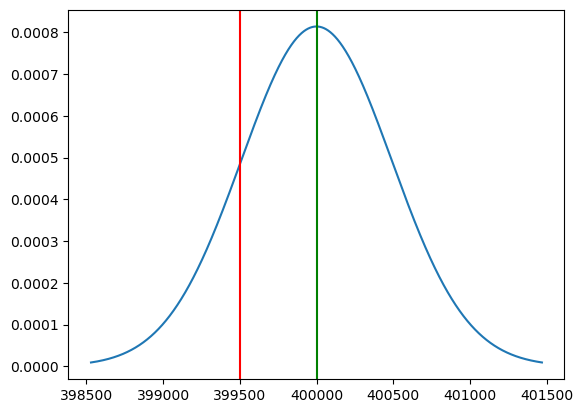

In [59]:
# параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399,5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result.round(3)*100, '%')

arange = np.arange((mu - 3 * sigma),(mu + 3 * sigma))

plt.plot(arange, st.norm.pdf(arange, mu, sigma))
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

Вероятность открытия 399,5 тыс. уведомлений, при рассылке 1 млн уведомлений, (с долей открытия 40 % получивших их клиентов) составляет 15,4 %. 

# Общий вывод:

 В процессе исследования данных популярного сервиса аренды самокатов **GoFast** мы проделали следующие шаги: 
- Изучена общая информация о трех датафреймах: 
  
Датафрейм `users_go.csv` содержит 1565 строк, пропуски отсутствуют. \
Датафрейм `rides_go.csv` содержит 18 068 строк, пропуски отсутствуют. \
Датафрейм `subscriptions_go.csv` содержит 2 строки, пропуски отсутствуют.

На этапе предобработки данных:
- Данные столбца `date` приведены к типу даты `datetime64`.
- В таблице `data_rides` создан новый столбец `month` с номером месяца.
- Расстояния в столбце `distance` и `duration` округлены до десятых.
- Устранены дубликаты в таблице `data_users`.
- В столбце `duration` таблицы `data_rides` выявлены и исправлены аномальные значения времени поездок.
  
На этапе исследовательского анализа данных выяснили, что:
- Количество пользователей в нашей выборке почти равномерно распределено между восьмью городами, однако:
- Большинство пользователей из Пятигорска - 219 чел., 14,3%.
- Меньше всего пользователей из Москвы - 168 чел., 11%.
- 54,4 % пользователей не используют подписку на сервис.
- Сервис является наиболее привлекательным для людей 25 лет.
- Основная масса поездок проходила на расстояние от 2 до 4,5 километров.
- Среднее время поездки занимает порядка 18 минут.

Далее, мы объединили данные о *пользователях*, *поездках* и *подписках* в один датафрейм `data`.

Из общего датафрейма выделили два типа пользователей:\
`data_free` - пользователи без платной подписки на сервис;\
`data_ultra` - пользователи с платной подпиской на сервис.

Визуализировали данные о расстоянии и времени поездок для каждого типа пользователей:\
Пользователи *без подписки* на сервис проезжают от **2** до **4,7** километров со средним временем поездки **17,5** минут.\
Тогда как пользователи *с платной подпиской* проезжают от **2,5** до **3,5** километров со средним временем поездки **18,5** минут.

После чего, мы создали новый датафрейм `agg_data` с агрегированными данными по *суммарному расстоянию, количеству поездок и суммарному времени* поездок для каждого пользователя, за каждый месяц на основе датафрейма `data` с объединенными данными.\
Добавили столбец с помесячной выручкой, которую принес каждый пользователь.\
Выяснили, что за год сервис **GoFast** показал выручку в **3,896** млн. рублей.

Проверили выдвинутые гипотезы и сделали вывод, что *пользователи с подпиской* тратят больше времени на поездки, а следовательно и являются *более "выгодными"* для компании; на это указывает ещё и тот факт, что помесячная *выручка пользователей с подпиской больше* помесячной выручки пользователей без подписки.\
Так же, они не превышают оптимального расстояния в 3130 метров в своих поездках, что благоприятно сказывается на износе самокатов.\
Пользователи без подписки преодолевают большие расстояния за меньшее среднее время, соответсовенно они двигаются быстрее, чем пользователи с подпиской.
Так как плата взымается поминутно, более *медленные* пользователи - выгодны для сервиса.

Если разослать 1 000 000 push-уведомлений в мобильном приложении (с 40% вероятностью того, что письмо будет открыто), вероятность открытия 399,5 тыс. уведомлений будет равна 15,4 %. 

**Заключение:**\
В ходе исследования мы увидели, что пользователи с платной подпиской предоставляют нашему сервису **GoFast** бОльшую выгоду, как в плане продолжительности поездок, так и в плане преодоления оптимального расстояния. А так же мы знаем, что доля пользователей без подписки (**54,4 %**) почти сопостовима с долей пользователей, которые пользуются платной подпиской (**45,6 %**).
Значит, руководство компании должно принимать шаги, чтобы доля пользователей с платной подпиской увеличивалась - ресурс людей, которые пользуются сервисом, но не имеют подписку имеется.  
